# Introduction

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.18.0


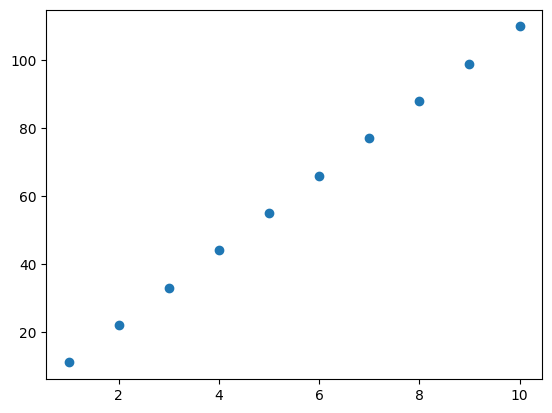

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
y = np.array([11, 22, 33, 44, 55, 66, 77, 88, 99, 110])

plt.scatter(X,y);

### The relation between X and y
from the graph we can see that, the relation between X and y is linear. Which means the relation will be a eqation of straight line which can be predicted quite easily by hand.

In [ ]:
y == (10*X)+X # This is the relation between X and y

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

## Steps in modelling with TensorFlow
1. Creating a model
2. Compiling a model
3. Fitting a model

# Model - 1

A model has been created using X from above as the input and y from above as the output. The relation between X and y is (y= 10X+X). This relation is set manually which is not a conventional way to build a machine learning/ deep learning model. The relation between the input and output is what the algorithm is supposed to find.

In [ ]:
X = tf.expand_dims(tf.constant(X),axis=-1)
y = tf.constant(y)

tf.random.set_seed(42)
my_model = tf.keras.Sequential()
my_model.add(tf.keras.layers.Dense(1))

my_model.compile(loss=tf.keras.losses.mae,
                 optimizer=tf.keras.optimizers.SGD(),
                 metrics=["mae"])

my_model.fit(X,y, epochs=5)

Epoch 1/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 471ms/step - loss: 65.7994 - mae: 65.7994
Epoch 2/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 65.4869 - mae: 65.4869
Epoch 3/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 65.1744 - mae: 65.1744
Epoch 4/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 64.8619 - mae: 64.8619
Epoch 5/5
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 64.5494 - mae: 64.5494


### Model Improvement - 1

In [ ]:
my_model_improvement = tf.keras.Sequential()
my_model_improvement.add(tf.keras.layers.Dense(100, activation='relu'))
my_model_improvement.add(tf.keras.layers.Dense(1))

my_model_improvement.compile(loss=tf.keras.losses.mae,
                  optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                  metrics = ["mae"])

my_model_improvement.fit(X,y, epochs=100)

Epoch 1/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 945ms/step - loss: 60.7417 - mae: 60.7417
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step - loss: 59.9553 - mae: 59.9553
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 59.1699 - mae: 59.1699
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 58.3791 - mae: 58.3791
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 57.5769 - mae: 57.5769
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 56.7649 - mae: 56.7649
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step - loss: 55.9356 - mae: 55.9356
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step - loss: 55.0796 - mae: 55.0796
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - loss: 54.1910 - mae: 54.1910
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 53.2656 - mae: 53.2656
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 52.2981 - mae: 52.2981
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 51.2848 - mae: 51.2848
Epoch 13/100
1/1 ━━━━━━━

In [ ]:
X_test = tf.constant([5])
X_test = tf.expand_dims(tf.constant(X_test),axis=-1)
print(X_test)
my_model_improvement.predict(X_test)

tf.Tensor([[5]], shape=(1, 1), dtype=int32)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


array([[55.63469]], dtype=float32)

# Model - 2


For model building, a dataset has been created using ```X=tf.range(1,100,2)``` and ```y=(X**2)+X```. In tf.range(1,100,2), 1 is the starting value, 100 is the ending value and 2 is the step-size. This time, we will build a model by using training-validation-test split. The steps are coded below.

### Creating the dataset

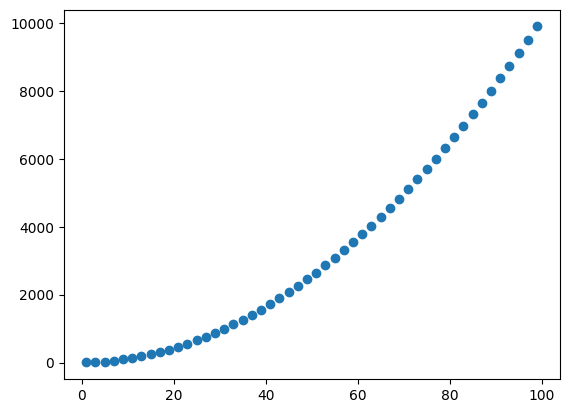

In [ ]:
X = tf.range(1,100,2)
y = (X**2)+X

X = tf.expand_dims(tf.constant(X),axis=-1)

plt.scatter(X,y);

In [ ]:
precent_80 = int(len(X)*0.8)


### Splitting the dataset into Train & Test

In [ ]:
X_train = X[:precent_80]
y_train = y[:precent_80]

X_test = X[precent_80:]
y_test = y[precent_80:]

### Plotting the train & test data

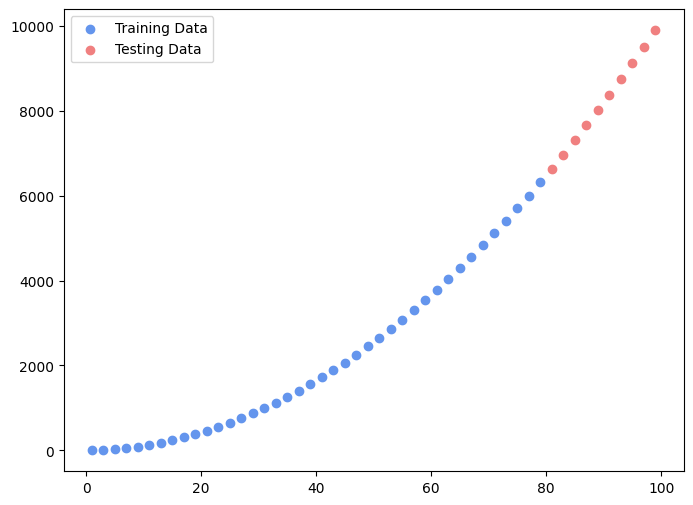

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X_train, y_train, c="cornflowerblue", label="Training Data")
plt.scatter(X_test, y_test, c="lightcoral", label="Testing Data")

plt.legend();

### Building the model

In [ ]:
X[0], y[0]

(<tf.Tensor: shape=(1,), dtype=int32, numpy=array([1], dtype=int32)>,
 <tf.Tensor: shape=(), dtype=int32, numpy=2>)

In [ ]:
tf.random.set_seed(42)

my_model_2 = tf.keras.Sequential(name="Model-2")
my_model_2.add(tf.keras.layers.Dense(10, input_shape=[1],name="input_layer"))
my_model_2.add(tf.keras.layers.Dense(1, input_shape=[1],name="output_layer"))

my_model_2.compile(loss = tf.keras.losses.mae,
                   optimizer = tf.keras.optimizers.SGD(),
                   metrics = ["mae"])

my_model_2.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "Model-2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (Dense)                  │ (None, 10)                  │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output_layer (Dense)                 │ (None, 1)                   │              11 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 31 (124.00 B)

 Non-trainable params: 0 (0.00 B)

*  **Trainable Parameters:** The parameters which the model updates while it is in the training process.
*  **Non-trainable Parameters:** The parameters that does not update during the training process. (Happens with transfer learning)

***Google for more***

---

### Fitting the model

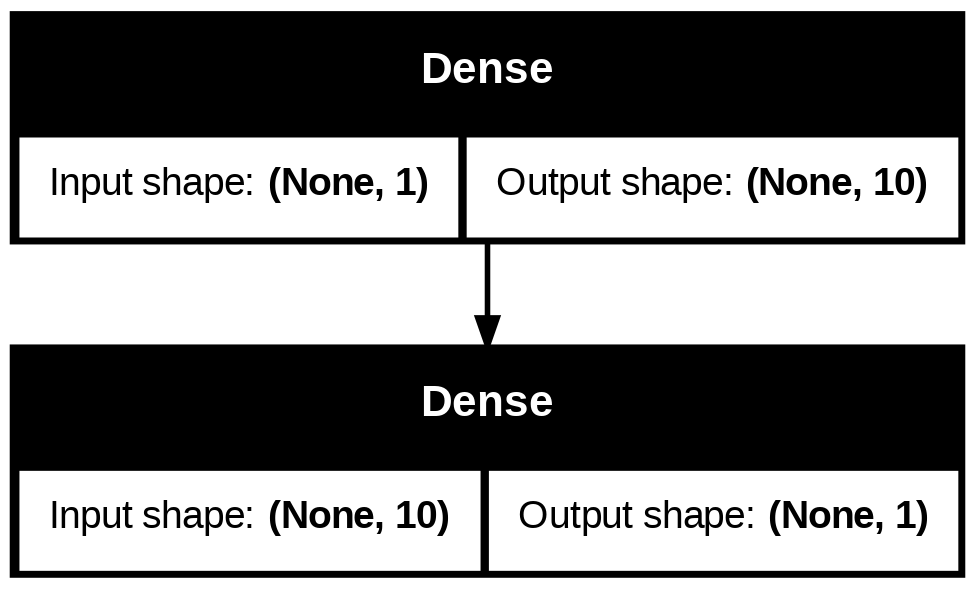

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(model=my_model_2, show_shapes=True)